<a href="https://colab.research.google.com/github/Bithi12345/DIP_Lab_Final-2019331505-/blob/main/2019331505.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task of DIP Lab Final 2024(SEC 2019-20):
1.  Upload the image(`DIP_Lab_task_01.png`) from drive with extracting details like: image dimension, frequency distribution of intensities, range. [5]
2.  Convert the RGB image(`DIP_Lab_task_02.jpg`) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison). [10]
3.  Apply Image(`DIP_Lab_task_03.png`) smoothing with appropriate kernel applied. Identify the noise(if any) before processing. [35]
4.  Implement an appropriate technique to reduce the brightness of the provided image (`DIP_Lab_task_04.jpg`) effectively. [20]
5.  Solve the segmentation problem for the given image: `'DIP_Lab_task_05.jpg'` [30]



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Task-1**
Upload the image(DIP_Lab_task_01.png) from drive with extracting details like: image dimension, frequency distribution of intensities, range.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

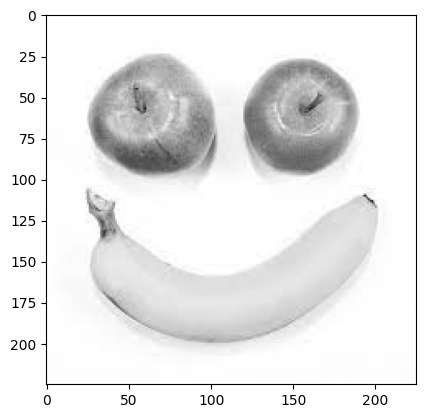

In [3]:
image_1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DIP_Lab_task_01 (1).png')
plt.imshow(image_1)

In [4]:
Dimension = image_1.shape
print("The dimension of the image_1 is: ", Dimension)

The dimension of the image_1 is:  (225, 225, 3)


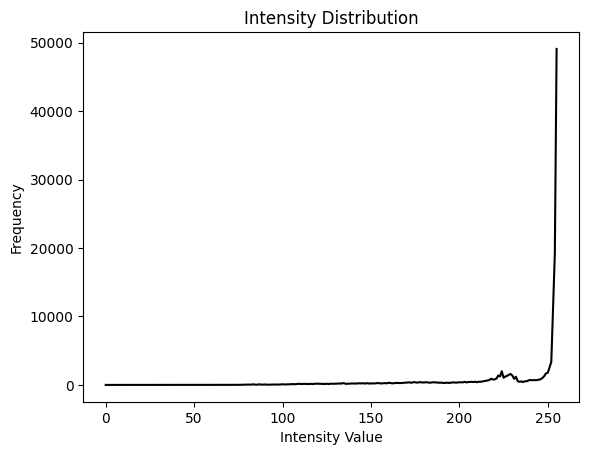

In [5]:
#frequency distribution of intensities
histogram = np.zeros(256, dtype=int)

for intensity in image_1.ravel():
    histogram[intensity] += 1

plt.plot(histogram, color = 'black')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.title('Intensity Distribution')
plt.show()

In [6]:
minimum_intensity = image_1.min()
maximum_intensity = image_1.max()
print("The intensity range of the image_1 is:", minimum_intensity, "to", maximum_intensity)

The intensity range of the image_1 is: 5 to 255


## **Task-2**
Convert the RGB image(DIP_Lab_task_02.jpg) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison).

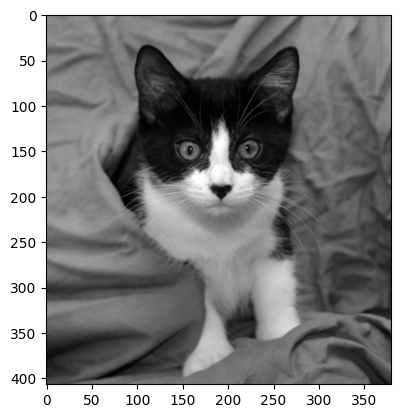

In [7]:
bgr_image_2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DIP_Lab_task_02 (1).jpg')

gray_image_2 = cv2.cvtColor(bgr_image_2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image_2, cmap = 'gray')

In [8]:

#compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison).
x1, y1 = 50, 50
x2, y2 = 100, 100
region_size = 5

Sub_region_1 = gray_image_2[y1:y1+region_size, x1:x1+region_size]
Sub_region_2 = gray_image_2[y2:y2+region_size, x2:x2+region_size]

differ = np.abs(Sub_region_1.astype(int) - Sub_region_2.astype(int))

print("1st 5x5 Sub-region Intensity Values:")
print(Sub_region_1)

print("\n2nd 5x5 Sub-region Intensity Values:")
print(Sub_region_2)

print("\nAbsolute Difference between Corresponding Intensities:")
print(differ)

mean_differ = np.mean(differ)
print("\nMean Absolute Difference: ",  mean_differ)

1st 5x5 Sub-region Intensity Values:
[[106 107 108 109 107]
 [114 115 113 114 112]
 [118 119 118 118 116]
 [120 120 121 120 118]
 [122 122 120 120 119]]

2nd 5x5 Sub-region Intensity Values:
[[119  88  36  16  31]
 [116  76  31  19  23]
 [110  67  28  16  26]
 [103  69  31  15  24]
 [107  70  32  17  18]]

Absolute Difference between Corresponding Intensities:
[[ 13  19  72  93  76]
 [  2  39  82  95  89]
 [  8  52  90 102  90]
 [ 17  51  90 105  94]
 [ 15  52  88 103 101]]

Mean Absolute Difference:  65.52


## **Task-3**
Apply Image(DIP_Lab_task_03.png) smoothing with appropriate kernel applied. Identify the noise(if any) before processing.

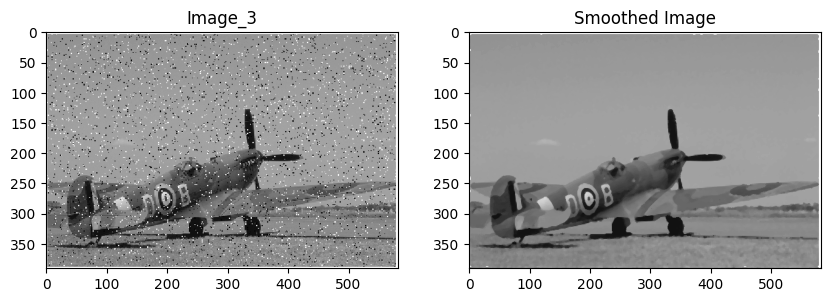

In [13]:

image3 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/DIP_Lab_task_03.png", cv2.IMREAD_GRAYSCALE)

def median_filter(image, kernel_size):
    rows, cols = image.shape
    pad_size = kernel_size // 2

    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

    output_image = np.zeros_like(image)

    for i in range(rows):
        for j in range(cols):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            output_image[i, j] = np.median(region)

    return output_image

smoothed_image = median_filter(image3, kernel_size=5)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image3, cmap='gray')
plt.title('Image_3')
plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.show()


## **Task-4**
Implement an appropriate technique to reduce the brightness of the provided image (DIP_Lab_task_04.jpg) effectively.

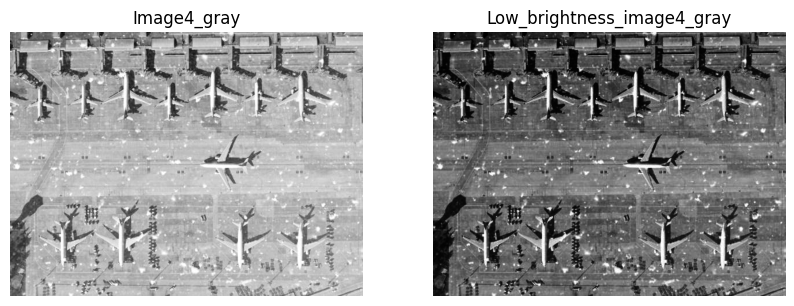

In [10]:

image4_gray = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DIP_Lab_task_04.jpg', cv2.IMREAD_GRAYSCALE)

gamma = 3

def gamma_correction_gray(image, gamma):

    normalized_image = image / 255.0
    c = 1.0
    result_image = c * (normalized_image ** gamma)
    result_image = np.uint8(result_image * 255)
    return result_image

low_brightness_image4_gray = gamma_correction_gray(image4_gray, gamma)

fig, axe = plt.subplots(1, 2, figsize = (10, 10))

axe[0].axis("off")
axe[1].axis("off")

axe[0].imshow(image4_gray, cmap = 'gray')
axe[1].imshow(cv2.cvtColor(low_brightness_image4_gray , cv2.COLOR_BGR2RGB))


axe[0].set_title("Image4_gray")
axe[1].set_title("Low_brightness_image4_gray")

plt.show()

# **Task-5**
Solve the segmentation problem for the given image: 'DIP_Lab_task_05.jpg'

Segmented_image: 


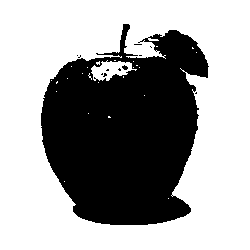

In [11]:

from google.colab.patches import cv2_imshow

image_5 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DIP_Lab_task_05 (1).jpg', cv2.IMREAD_GRAYSCALE)

def global_thresholding(image):

    pixels = image.flatten()
    total_pixels = pixels.size
    threshold = np.mean(pixels)

    while True:
        group1 = pixels[pixels <= threshold]
        group2 = pixels[pixels > threshold]

        avg1 = np.mean(group1) if group1.size else 0
        avg2 = np.mean(group2) if group2.size else 0

        new_threshold = (avg1 + avg2) / 2

        if abs(threshold - new_threshold) < 1:
            break

        threshold = new_threshold

    return threshold

threshold_value = global_thresholding(image_5)

image1 = image_5 > threshold_value

image2 = np.uint(image1)

thresholded_image = image2 * 255

print("Segmented_image: ")

cv2_imshow(thresholded_image)